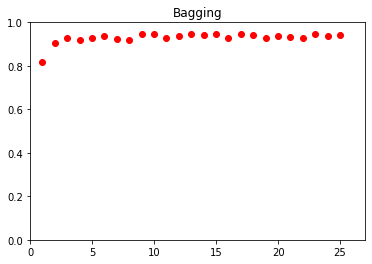

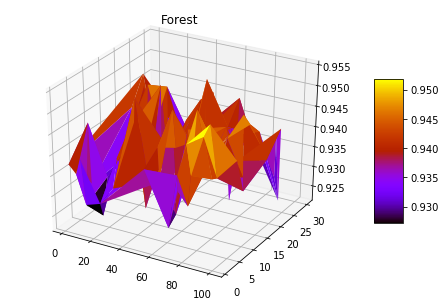

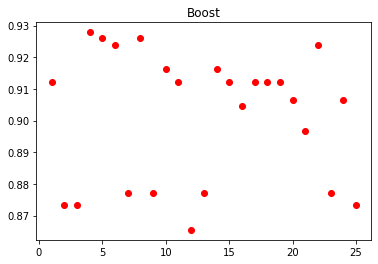

In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import tree, ensemble
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D



class Evaluation:
    def __init__(self):
        self.cancer = load_breast_cancer()
        self.X_train, self.X_test, self.y_train, self.y_test \
            = train_test_split(self.cancer.data, self.cancer.target, test_size=0.9)
        self.tree_score = 0
        self.bagging_score = {}
        self.boost_score = {}
        self.forest_score = {}

    def decision_tree(self):
        t1 = tree.DecisionTreeClassifier(criterion="gini").fit(self.X_train, self.y_train)
        self.tree_score = t1.score(self.X_test, self.y_test)
        

    def bagging(self):
        for i in range(1,26):
            bagging = ensemble.BaggingClassifier(tree.DecisionTreeClassifier(), n_estimators=i).fit(self.X_train, self.y_train)
            self.bagging_score[i] = bagging.score(self.X_test, self.y_test)

        k = list(self.bagging_score.keys())
        v = list(self.bagging_score.values())
        
        plt.plot(k, v, 'ro')
        plt.title("Bagging")
        plt.axis([0,27,0,1])
        plt.show()


    def forest(self):
        maxFeatures = []
        
        for i in range(1, 102):
            maxFeature = random.randrange(1,31)
            maxFeatures.append(maxFeature)
            
            forest = ensemble.RandomForestClassifier(criterion="gini", max_features=maxFeature, n_estimators=20).fit(self.X_train, self.y_train)
            self.forest_score[i] = forest.score(self.X_test, self.y_test)
            
        X = np.array(list(self.forest_score.keys()))
        Y = np.array(maxFeatures)
        Z = np.array(list(self.forest_score.values()))
        fig = plt.figure()
        ax = Axes3D(fig)
        surf = ax.plot_trisurf(X, Y, Z, cmap=cm.gnuplot, linewidth=0.5)
        fig.colorbar(surf, shrink=0.5, aspect=5)
        
        plt.title("Forest")
        plt.show()

    def boost(self):
        for i in range(1, 26):
            boost = ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(), n_estimators=i).fit(self.X_train, self.y_train)
            self.boost_score[i] = boost.score(self.X_test, self.y_test)
            
        k = list(self.boost_score.keys())
        v = list(self.boost_score.values())
        
        plt.plot(k, v, 'ro')
        plt.title("Boost")
        plt.show()


    #def summary(self):


if __name__ == '__main__':
    exp = Evaluation()
    exp.decision_tree()
    exp.bagging()
    exp.forest()
    exp.boost()
    #exp.summary()